In [1]:
import torch
import Dataprep
import NeuralNetwork
import numpy as np

In [2]:
(basic_trn, basic_val), (encode_trn, encode_val) = Dataprep.get_data()
print("basic data preperation training: data", basic_trn[0].shape, "labels", basic_trn[1].shape)
print("basic data preperation test: data", basic_val[0].shape, "labels", basic_val[1].shape)
print("encoded fuel types data preperation training: data", encode_trn[0].shape, "labels", encode_trn[1].shape)
print("encoded fuel types data preperation test: data", encode_val[0].shape, "labels", encode_val[1].shape)

basic data preperation training: data (13954, 6) labels (13954, 1)
basic data preperation test: data (3488, 6) labels (3488, 1)
encoded fuel types data preperation training: data (13954, 9) labels (13954, 1)
encoded fuel types data preperation test: data (3488, 9) labels (3488, 1)


In [3]:
basic_trn = (torch.Tensor(basic_trn[0]), torch.Tensor(basic_trn[1]))
basic_val = (torch.Tensor(basic_val[0]), torch.Tensor(basic_val[1]))

encode_trn = (torch.Tensor(encode_trn[0]), torch.Tensor(encode_trn[1]))
encode_val = (torch.Tensor(encode_val[0]), torch.Tensor(encode_val[1]))

In [4]:
BATCH_SIZE = 64
EPOCHS = 150
LEARNING_RATE = 0.05
MOMENTUM = 0.8

In [5]:
net_b = NeuralNetwork.make_model(1, basic_trn[0].shape[1], [128], basic_trn[1].shape[1])
print(net_b)

net_e = NeuralNetwork.make_model(1, encode_trn[0].shape[1], [128], encode_trn[1].shape[1])
print(net_e)

opt_b = torch.optim.SGD(net_b.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
opt_e = torch.optim.SGD(net_e.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
loss = torch.nn.BCELoss()

Sequential(
  (layer0): Linear(in_features=6, out_features=128, bias=True)
  (activation0): ReLU()
  (output): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Sequential(
  (layer0): Linear(in_features=9, out_features=128, bias=True)
  (activation0): ReLU()
  (output): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


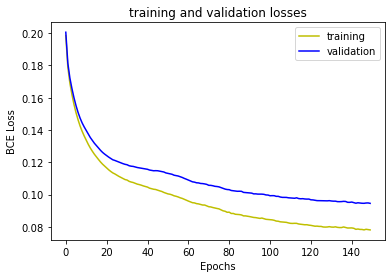

In [6]:
t_loss, v_loss = NeuralNetwork.train_model(net_b, opt_b, loss, basic_trn, basic_val, BATCH_SIZE, EPOCHS)

NeuralNetwork.ploter(t_loss, v_loss)

In [7]:
predictions = net_b(basic_val[0])
print(NeuralNetwork.check_accuracy(predictions.detach().numpy(), basic_val[1].detach().numpy()))

0.9641628440366973


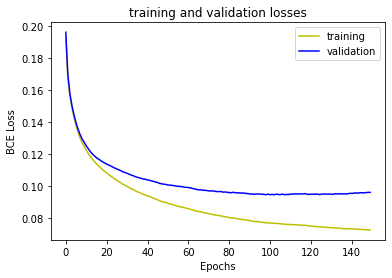

In [8]:
t_loss, v_loss = NeuralNetwork.train_model(net_e, opt_e, loss, encode_trn, encode_val, BATCH_SIZE, EPOCHS)

NeuralNetwork.ploter(t_loss, v_loss)

In [9]:
predictions = net_e(encode_val[0])
print(NeuralNetwork.check_accuracy(predictions.detach().numpy(), encode_val[1].detach().numpy()))

0.9615825688073395
